In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [3]:
def average_epoch(scalars, epoch_length):  # Weight between 0 and 1
    averaged = []
    num_epochs = int(len(scalars) / epoch_length)
    for curr_idx in range(num_epochs):
        averaged.append(np.mean(scalars[curr_idx*epoch_length:(curr_idx+1)*epoch_length]))
    return averaged

In [4]:
log_dir = '/scratch/yy2694/llm-memory/checkpoints/'

In [5]:
log_folders = os.listdir(log_dir)

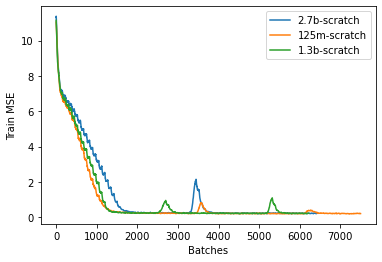

In [13]:
for log_folder in log_folders:
#     epoch_folders = os.listdir(log_folder)
#     epoch_folders = [os.path.join(log_folder, epoch_folder) for epoch_folder in epoch_folders]
#     print(epoch_folders)

#     for epoch_idx in range(20):
#         epoch_folder = os.path.join(log_folder, f"epoch_{epoch_idx}")
#         result_npz_file = os.path.join(epoch_folder, 'batch4_gpu2_results.npz')
#         result = np.load(result_npz_file)
    if log_folder.endswith('scratch'):
        epoch_folder = os.path.join(log_dir, log_folder, f"final")
        result_npz_file = os.path.join(epoch_folder, 'batch4_gpu2_results.npz')
        result = np.load(result_npz_file)
        plt.plot(smooth(result['train_losses_ckpt'], 0.95), label=log_folder[4:])
        # plt.plot(average_epoch(result['train_losses_ckpt'], 75), label=log_folder[4:])
plt.ylabel('Train MSE')
plt.xlabel('Batches')
plt.legend()


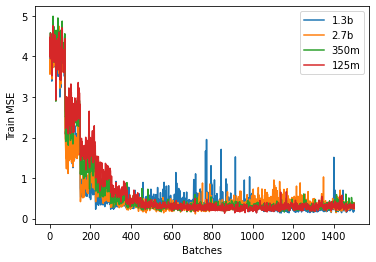

In [14]:
for log_folder in log_folders:
    if not log_folder.endswith('scratch'):
        epoch_folder = os.path.join(log_dir, log_folder, f"final")
        result_npz_file = os.path.join(epoch_folder, 'batch4_gpu2_results.npz')
        result = np.load(result_npz_file)
        plt.plot(smooth(result['train_losses_ckpt'], 0.), label=log_folder[4:])
        # plt.plot(average_epoch(result['train_losses_ckpt'], 75), label=log_folder[4:])
plt.ylabel('Train MSE')
plt.xlabel('Batches')
plt.legend()

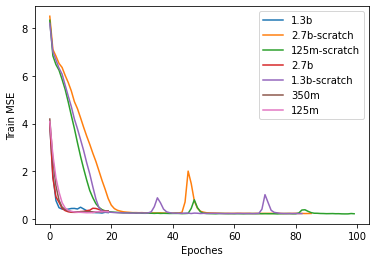

In [8]:
for log_folder in log_folders:
    
    epoch_folder = os.path.join(log_dir, log_folder, f"final")
    result_npz_file = os.path.join(epoch_folder, 'batch4_gpu2_results.npz')
    result = np.load(result_npz_file)
#         plt.plot(smooth(result['train_losses_ckpt'], 0.), label=log_folder[4:])
    plt.plot(average_epoch(result['train_losses_ckpt'], 75), label=log_folder[4:])

plt.ylabel('Train MSE')
plt.xlabel('Epoches')
plt.legend()

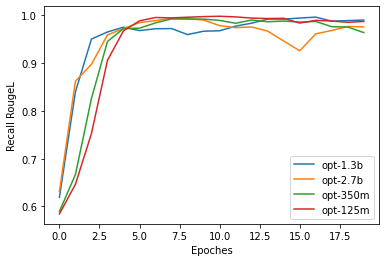

In [9]:
for log_folder in log_folders:
    if not log_folder.endswith('scratch'):
        rouge_scores = []
        for epoch_idx in range(20):
            epoch_folder = os.path.join(log_dir, log_folder, f"eval_epoch_{epoch_idx}")
            result_npz_file = os.path.join(epoch_folder, 'batch4_gpu2_results.npz')
            result = np.load(result_npz_file, allow_pickle=True)
            rouge_scores.append(result['results'].item()['rougeL'])
        plt.plot(rouge_scores, label=log_folder)
plt.ylabel('Recall RougeL')
plt.xlabel('Epoches')
plt.legend()


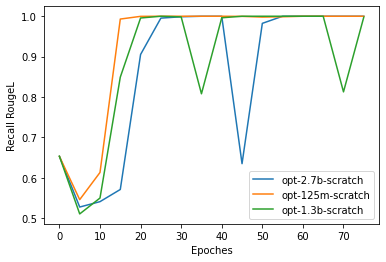

In [10]:
for log_folder in log_folders:
    if log_folder.endswith('scratch'):
        rouge_scores = []
        for epoch_idx in range(16):
            epoch_folder = os.path.join(log_dir, log_folder, f"eval_epoch_{max(epoch_idx*5-1, 0)}")
            result_npz_file = os.path.join(epoch_folder, 'batch4_gpu2_results.npz')
            result = np.load(result_npz_file, allow_pickle=True)
            rouge_scores.append(result['results'].item()['rougeL'])
        plt.plot(range(0, 80, 5), rouge_scores, label=log_folder)
plt.ylabel('Recall RougeL')
plt.xlabel('Epoches')
plt.legend()